## Предварительная обработка данных: подсчет пустых и уникальных значений, определение и удаление выбросов

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
def brief_df (df):
  # Подсчитываем пустые значения и уникальные значение
  rows_na =df.isna().sum().reset_index().rename(columns={0: "valuesNa"})
  rows_notna = df.notna().sum().reset_index().rename(columns={0: "valuesNotNa"})
  rows_analysis = pd.merge(rows_na, rows_notna, on="index", how= "outer")
  rows_analysis["completeRatio"] = round((rows_analysis["valuesNotNa"]) / (rows_analysis["valuesNotNa"]+rows_analysis["valuesNa"])*100,2)

  cardinality = df.nunique().reset_index().rename(columns={0: "cardinality"})
  rows_analysis = pd.merge(rows_analysis, cardinality)

  # Размер датасета и кол-во дубликатов
  print("Размер:", df.shape)
  dup_raw = df.duplicated ().sum()
  dup_per = round((dup_raw*100)/df.shape[0],2)
  print ("Дубликаты:", dup_raw, "-&gt;", dup_per, "%")

  # Статистика по пустым значениям
  print("Проверка на отсутсвующие значениия")
  display(rows_analysis)

  # Первые пять строк
  print("Первые пять строк")
  display(df.head())

In [4]:
brief_df(df)

Размер: (1338, 7)
Дубликаты: 1 -&gt; 0.07 %
Проверка на отсутсвующие значениия


,index,valuesNa,valuesNotNa,completeRatio,cardinality
0,age,0,1338,100.0,47
1,sex,0,1338,100.0,2
2,bmi,0,1338,100.0,548
3,children,0,1338,100.0,6
4,smoker,0,1338,100.0,2
5,region,0,1338,100.0,4
6,charges,0,1338,100.0,1337


Первые пять строк


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


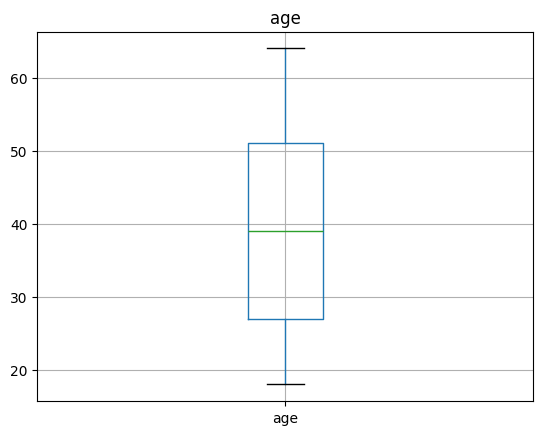

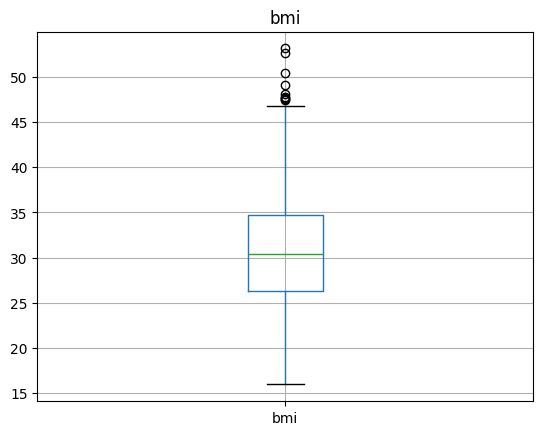

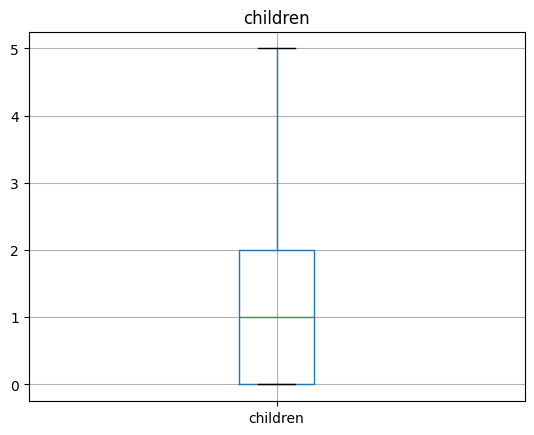

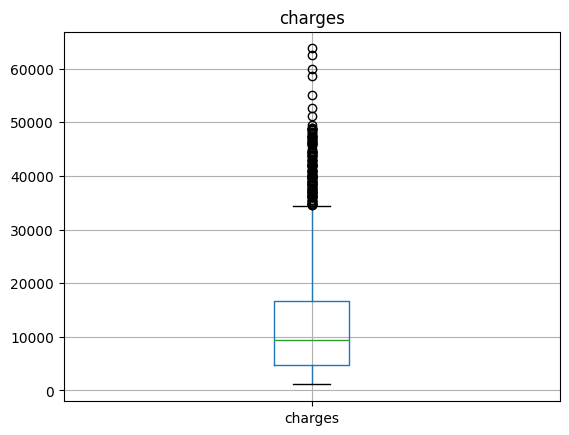

In [5]:
# Строю боксплот, на котором смотрю на выбросы
for column in ['age', 'bmi', 'children']:
    plt.figure()
    df[[column]].boxplot(showfliers=True)
    plt.title(column)

plt.show()

In [14]:



#кодирую категориальные значения 
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker','region'])
print(df_encoded)

#преобразую стр в инт и флоат
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['sex'] = pd.to_numeric(df['sex'], errors='coerce')
df['children'] = pd.to_numeric(df['children'], errors='coerce')
df['smoker'] = pd.to_numeric(df['smoker'], errors='coerce')
df['smoker'] = pd.to_numeric(df['smoker'], errors='coerce')
df['region'] = pd.to_numeric(df['region'], errors='coerce')

# Определяю выбросы для каждого числового столбца z critery
from scipy import stats
z_scores = stats.zscore(df)
threshold = 3
outliers = np.where(np.abs(z_scores) > threshold)
print(outliers)

df = df[~df.isin(outliers)].dropna()

      age     bmi  children      charges
0      19  27.900         0  16884.92400
1      18  33.770         1   1725.55230
2      28  33.000         3   4449.46200
3      33  22.705         0  21984.47061
4      32  28.880         0   3866.85520
...   ...     ...       ...          ...
1333   50  30.970         3  10600.54830
1334   18  31.920         0   2205.98080
1335   18  36.850         0   1629.83350
1336   21  25.800         0   2007.94500
1337   61  29.070         0  29141.36030

[1338 rows x 4 columns]
(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [ ]:
# Сравните количество строк (наблюдений) в исходном DataFrame и DataFrame без выбросов
original_length = len(df)
new_length = len(df_no_outliers)

print(f"Количество строк в исходном датасете: {original_length}")
print(f"Количество строк в датасете без выбросов: {new_length}")

Количество строк в исходном датасете: 1338
Количество строк в датасете без выбросов: 1338


## Процесс распределения датасета на тестовую и обучающую выборки

In [ ]:
# Использую метод get_dummies() для кодирования категориальных признаков
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# drop_first=True удаляет первый столбец каждого кодированного признака, чтобы избежать мультиколлинеарности

# Теперь df_encoded содержит закодированные категориальные признаки


In [ ]:
from sklearn.model_selection import train_test_split

# Выбираем только необходимые признаки
selected_features = ['age', 'bmi', 'children']
X = df[selected_features]  # Матрица признаков

# Наша целевая переменная
y = df['charges']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# test_size - доля данных, которые будут использованы для тестирования (здесь 20%)
# random_state - устанавливает начальное состояние для генератора случайных чисел (для воспроизводимости)

# X_train и y_train - обучающие данные и соответствующая целевая переменная для обучения
# X_test и y_test - тестовые данные и соответствующая целевая переменная для тестов
